In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Getting Basic Info


In [2]:
crop = pd.read_csv("Crop_recommendation.csv")
crop

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


In [3]:
crop["label"].nunique()

22

In [4]:
crop["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [5]:
crop.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [6]:
crop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
crop.isna().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

## Looking for outliers

<AxesSubplot:>

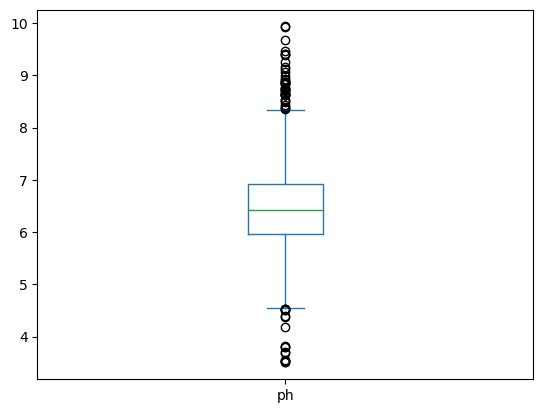

In [8]:
crop["ph"].plot(kind='box')

<AxesSubplot:>

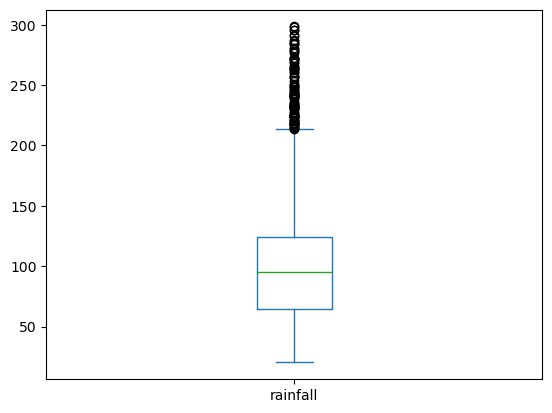

In [9]:
crop["rainfall"].plot(kind="box")

<AxesSubplot:>

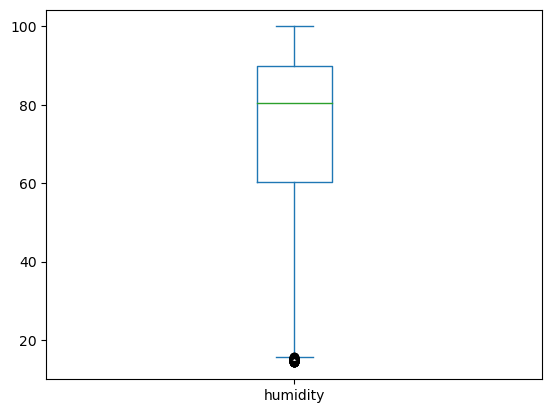

In [10]:
crop["humidity"].plot(kind="box")

<AxesSubplot:>

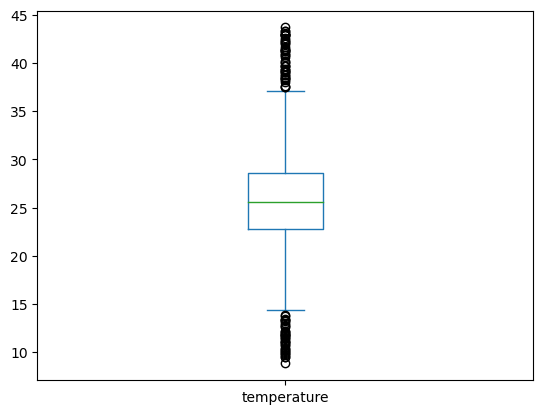

In [11]:
crop["temperature"].plot(kind="box")

<AxesSubplot:>

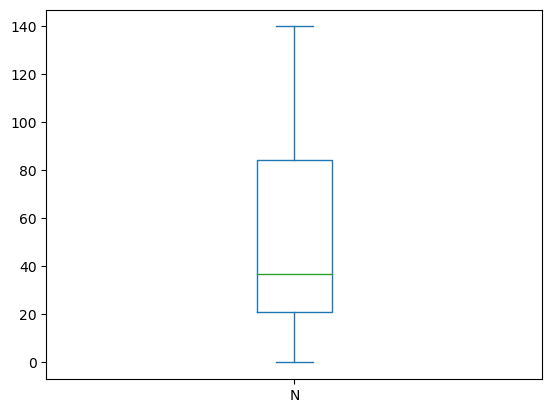

In [12]:
crop["N"].plot(kind="box")

<AxesSubplot:>

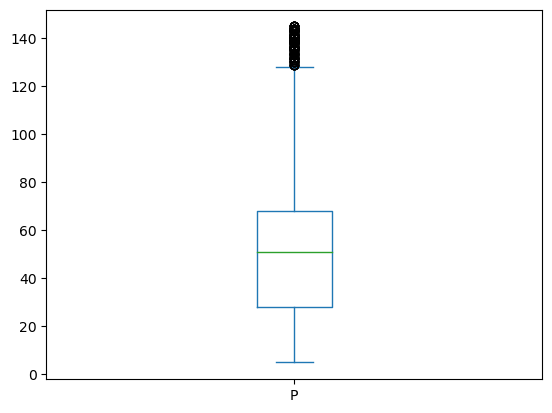

In [13]:
crop["P"].plot(kind="box")

<AxesSubplot:>

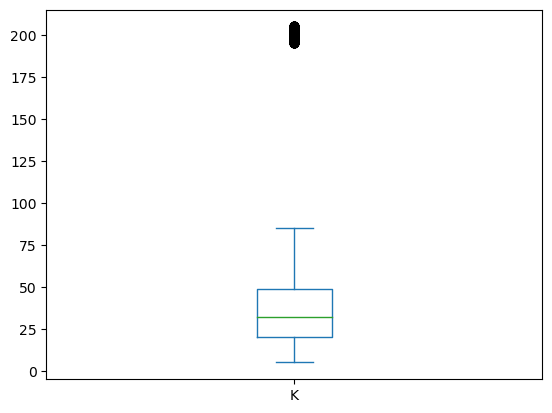

In [14]:
crop["K"].plot(kind="box")

## Removing Outliers 
### Value of K has very large diffrence

In [15]:
df = crop.loc[crop["K"]>100,["label"]]
df["label"].unique()

array(['grapes', 'apple'], dtype=object)

In [16]:
crop_filtered = crop[crop["label"]!='apple' ]
crop_filtered = crop_filtered[crop_filtered["label"]!='grapes' ]

In [17]:
crop_filtered

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice
...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee


## Encoding the target variable and mapping the corresponding values

In [18]:
from sklearn.preprocessing import LabelEncoder
l = LabelEncoder()
crop_filtered["crop_name"]=crop_filtered["label"]
crop_filtered.label = l.fit_transform(crop_filtered.label)
crop_filtered

,N,P,K,temperature,humidity,ph,rainfall,label,crop_name
0,90,42,43,20.879744,82.002744,6.502985,202.935536,18,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,18,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,18,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,18,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,18,rice
...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,4,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,4,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,4,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,4,coffee


In [19]:
dict_crop_name = {
    0: "Banana", 1: "Blackgram" , 2: "Chikpea" , 3: "Coconut" , 4: "Coffee" , 5 : "Cotton" ,
    6 : "Jute" , 7: "Kidney Beans" , 8: "Lentil" , 9: "Maize", 10: " Mango",11: "Moth Beans" ,12: "Mung Beans" ,13:"Musk Melons" ,
    14 : "Orange" ,15: "Papaya" , 16: "Pigeon Peas",17: "Pomegranate",18:"Rice",19:"Watermelon"}

In [20]:
dict_crop_name

{0: 'Banana',
 1: 'Blackgram',
 2: 'Chikpea',
 3: 'Coconut',
 4: 'Coffee',
 5: 'Cotton',
 6: 'Jute',
 7: 'Kidney Beans',
 8: 'Lentil',
 9: 'Maize',
 10: ' Mango',
 11: 'Moth Beans',
 12: 'Mung Beans',
 13: 'Musk Melons',
 14: 'Orange',
 15: 'Papaya',
 16: 'Pigeon Peas',
 17: 'Pomegranate',
 18: 'Rice',
 19: 'Watermelon'}

## Structuring DF

In [21]:
crop_filtered.sort_values(by="label",ascending=True,inplace=True)

In [22]:
crop_filtered.reset_index(inplace=True)

In [23]:
crop_filtered.drop('index',axis = 1,inplace=True)
crop_filtered

,N,P,K,temperature,humidity,ph,rainfall,label,crop_name
0,97,74,45,26.475226,78.518338,5.677720,113.116109,0,banana
1,108,72,46,25.162782,84.978492,6.110845,90.945546,0,banana
2,120,87,52,28.076445,76.055221,5.905495,118.992357,0,banana
3,93,85,49,27.967991,79.286257,5.694244,119.476556,0,banana
4,92,75,45,29.012077,77.951925,5.674403,90.434954,0,banana
...,...,...,...,...,...,...,...,...,...
1995,112,28,54,24.860946,85.053186,6.738031,55.295635,19,watermelon
1996,116,5,54,25.376013,80.993135,6.653987,57.230285,19,watermelon
1997,91,21,50,24.335282,81.440304,6.762030,48.321136,19,watermelon
1998,119,7,55,26.038677,84.637838,6.031424,44.399338,19,watermelon


## Splitting Data

In [24]:
X = crop_filtered.drop(['label','crop_name'],axis=1)
y = crop_filtered['label']
y_names = crop_filtered['crop_name']

In [25]:
X.head()

,N,P,K,temperature,humidity,ph,rainfall
0,97,74,45,26.475226,78.518338,5.677720,113.116109
1,108,72,46,25.162782,84.978492,6.110845,90.945546
2,120,87,52,28.076445,76.055221,5.905495,118.992357
3,93,85,49,27.967991,79.286257,5.694244,119.476556
4,92,75,45,29.012077,77.951925,5.674403,90.434954


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB

In [27]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=1,test_size=0.2)


In [28]:
Scaler = MinMaxScaler()
X_train_normalized = Scaler.fit_transform(X_train)
X_test_normalized = Scaler.transform(X_test)

## KNN

In [29]:
KNN = KNeighborsClassifier()
KNN.fit(X_train_normalized,y_train)
KNN_SCORE = KNN.score(X_test_normalized,y_test)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [30]:
KNN_SCORE


0.98

In [31]:
y_pred1 = KNN.predict(X_test_normalized)
accuracy_score(y_test,y_pred1)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


0.98

## GBC

In [32]:
grad = GradientBoostingClassifier()
grad.fit(X_train_normalized,y_train)
grad.score(X_test_normalized,y_test)

0.9825

In [33]:
y_pred2 = grad.predict(X_test_normalized)
accuracy_score(y_test,y_pred2)

0.9825

## Guassian NB

In [34]:
nb = GaussianNB()
nb.fit(X_train_normalized,y_train)
y_pred3 = nb.predict(X_test_normalized)
accuracy_score(y_test,y_pred3)

0.9925

In [ ]:
nb.save()

In [35]:
nb.score(X_test_normalized,y_test)

0.9925

In [36]:
final_data = pd.DataFrame({'Models': ['KNN','GradientBoosting','NaiveBayes'],
                          'Accuracy':[accuracy_score(y_test,y_pred1)*100,
                                     accuracy_score(y_test,y_pred2)*100,
                                     accuracy_score(y_test,y_pred3)*100]})

final_data

,Models,Accuracy
0,KNN,98.00
1,GradientBoosting,98.25
2,NaiveBayes,99.25


C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Models', ylabel='Accuracy'>

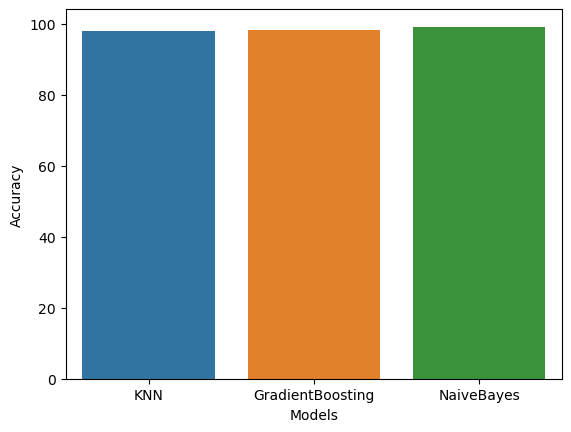

In [37]:
import seaborn as sns
sns.barplot(final_data['Models'], final_data['Accuracy'])

## Validating the model using K-Fold Cross Validation

In [38]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [39]:
for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9]):
    print(train_index, test_index)

[3 4 5 6 7 8] [0 1 2]
[0 1 2 6 7 8] [3 4 5]
[0 1 2 3 4 5] [6 7 8]


### Using K-Fold in a function for determing accuracy on testing data for different models

In [40]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [41]:
from sklearn.model_selection import StratifiedKFold
folds = StratifiedKFold(n_splits=3)

scores_KNN = []
scores_GBC = []
scores_NaiveBayes = []

for train_index, test_index in folds.split(X,y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    scores_KNN.append(get_score(KNeighborsClassifier(),X_train, X_test, y_train, y_test))
    scores_GBC.append(get_score(GradientBoostingClassifier(),X_train, X_test, y_train, y_test))
    scores_NaiveBayes.append(get_score(GaussianNB(),X_train, X_test, y_train, y_test))

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [42]:
scores_KNN

[0.9820089955022488, 0.9775112443778111, 0.9804804804804805]

In [43]:
scores_GBC

[0.9865067466266867, 0.9805097451274363, 0.9804804804804805]

In [44]:
scores_NaiveBayes

[0.9940029985007496, 0.992503748125937, 0.9954954954954955]

## Validating the model using cross_val_score

In [45]:
from sklearn.model_selection import cross_val_score

In [46]:
cross_val_score(KNeighborsClassifier(),X,y)

C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\User\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

array([0.985 , 0.9725, 0.9775, 0.9725, 0.9775])

In [47]:
cross_val_score(GradientBoostingClassifier(),X,y)

array([0.9975, 0.9875, 0.985 , 0.9725, 0.99  ])

In [48]:
cross_val_score(GaussianNB(),X,y)

array([0.9925, 0.995 , 0.995 , 0.9975, 0.9925])

In [49]:
probs = KNN.predict_proba(X_test)
best_n = np.argsort(-probs, axis=1)[:, :3]

C:\Users\User\anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


In [50]:
best_n


array([[18, 15,  0],
       [18, 15,  0],
       [18, 15,  0],
       ...,
       [ 0, 18, 17],
       [ 0, 18, 17],
       [ 0, 18, 17]], dtype=int64)

In [52]:
import joblib
filename = 'crop_predict.h5'
joblib.dump(nb, filename)

['crop_predict.h5']